# Stage 1 - Exploratory Data Analysis

---

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [ ]:
'''
!pip install numpy==1.23.5
!pip install pandas==2.0.2
'''

#Kalau dilocal ga berhasil/error diganti %pip ya, atau kalian bisa upgrade langsung di terminal usahain pakai versi ini sejauh ini yang ga error versi ini
#Jangan lupa habis ganti version di restart kernelnya (local) / runtime (colab) nya
# ''' ''' ini itu buat komentar kalau aku run di hapus dulu jangan langsung run jadinya text, sama jangan di run all ya kalau merasa bisa menyebabkan error

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# **Load and Descriptive Statistics**

## Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
# Melakukan import csv
df = pd.read_csv("/content/drive/MyDrive/Data Geeks/Stage 1/train.csv")
df.sample(5)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
150830  150831    Male   39                1         46.0                   0   
136596  136597  Female   24                1         28.0                   0   
192279  192280  Female   23                1          8.0                   1   
247620  247621    Male   20                1         10.0                   0   
20809    20810    Male   32                1         41.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
150830    1-2 Year             No         53779.0                 124.0   
136596    1-2 Year            Yes         34496.0                 124.0   
192279    < 1 Year             No         26821.0                 152.0   
247620    < 1 Year            Yes         25635.0                 160.0   
20809     < 1 Year             No         39805.0                 152.0   

        Vintage  Response  
150830      168         1  
136596       43         1  
192279      293         0  
247620       78         0  
20809        81         0

In [ ]:
df = pd.read_csv("drive/MyDrive/train.csv")
df.sample(5)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
175721  175722    Male   60                1         30.0                   1   
68513    68514    Male   65                1         28.0                   0   
339630  339631    Male   22                1         46.0                   0   
338084  338085  Female   44                1         16.0                   0   
68043    68044    Male   22                1          4.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
175721    1-2 Year             No         36737.0                 140.0   
68513     1-2 Year            Yes         34047.0                  26.0   
339630    < 1 Year            Yes         31223.0                 152.0   
338084    1-2 Year            Yes         37429.0                 155.0   
68043     < 1 Year            Yes         22979.0                 152.0   

        Vintage  Response  
175721       99         0  
68513        23         1  
339630       35         0  
338084      154         1  
68043       101         0

## Descriptive Statictics

In [ ]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

False
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [ ]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['id'],inplace=True)
num = num.columns
cats = ['Gender','Vehicle_Age','Vehicle_Damage']

In [ ]:
df[num].describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24405.000000             29.000000      82.000000       0.000000  
50%      31669.000000            133.000000     154.000000       0.000000  
75%      39400.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

In [ ]:
df[cats].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [ ]:
# Mengecek unique value, modus, dan frekuensi modus dari tiap kolom
nums = df[num]
for i in nums:
  x = nums[i].mode()[0]
  y = nums[i].value_counts()[x]
  z = nums[i].nunique()
  print(f'Terdapat {z} unique values dan modus dari kolom {i} = {x} dengan frekuensi sebesar {y}')

Terdapat 66 unique values dan modus dari kolom Age = 24 dengan frekuensi sebesar 25960
Terdapat 2 unique values dan modus dari kolom Driving_License = 1 dengan frekuensi sebesar 380297
Terdapat 53 unique values dan modus dari kolom Region_Code = 28.0 dengan frekuensi sebesar 106415
Terdapat 2 unique values dan modus dari kolom Previously_Insured = 0 dengan frekuensi sebesar 206481
Terdapat 48838 unique values dan modus dari kolom Annual_Premium = 2630.0 dengan frekuensi sebesar 64877
Terdapat 155 unique values dan modus dari kolom Policy_Sales_Channel = 152.0 dengan frekuensi sebesar 134784
Terdapat 290 unique values dan modus dari kolom Vintage = 256 dengan frekuensi sebesar 1418
Terdapat 2 unique values dan modus dari kolom Response = 0 dengan frekuensi sebesar 334399


In [ ]:
# Mengecek ukuran penyebaran
nums = df[num]
for i in nums:
  minv = nums[i].min()
  maxv = nums[i].max()
  Q1 = nums[i].quantile(.25)
  Q3 = nums[i].quantile(.75)
  total_range = maxv-minv
  var = round(nums[i].var(),2)
  iqr = Q3-Q1
  print (f'Ukuran penyebaran dari kolom {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Ukuran penyebaran dari kolom Age, variance = 240.61, range = 65, IQR = 24.0
Ukuran penyebaran dari kolom Driving_License, variance = 0.0, range = 1, IQR = 0.0
Ukuran penyebaran dari kolom Region_Code, variance = 175.03, range = 52.0, IQR = 20.0
Ukuran penyebaran dari kolom Previously_Insured, variance = 0.25, range = 1, IQR = 1.0
Ukuran penyebaran dari kolom Annual_Premium, variance = 296292707.02, range = 537535.0, IQR = 14995.0
Ukuran penyebaran dari kolom Policy_Sales_Channel, variance = 2938.07, range = 162.0, IQR = 123.0
Ukuran penyebaran dari kolom Vintage, variance = 7000.89, range = 289, IQR = 145.0
Ukuran penyebaran dari kolom Response, variance = 0.11, range = 1, IQR = 0.0


## Kesimpulan

1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
    > Dari 12 kolom, terdapat beberapa kolom yang perlu disesuaikan baik dari tipe data maupun nama kolomnya agar lebih mudah dimengerti,
    > * id = ID unik untuk tiap customer. **Sudah sesuai**.
    > * Gender = Jenis kelamin dari customer. **Sudah sesuai**.
    > * Age = Usia customer. **Sudah sesuai**.
    > * Driving_License = 0 : customer tidak memiliki izin mengemudi, 1 : customer memiliki izin mengemudi. **Sudah sesuai**.
    > * Region_Code = Kode unik untuk tiap wilayah customer. **Sudah sesuai**.
    > * Previously_Insured = 0 : Customer belum memiliki 'Asuransi Kendaraan', 1 : Customer sudah memiliki 'Asuransi Kendaraan'. **Sudah sesuai**.
    > * Vehicle_Age = Usia dari kendaraan milik customer. **Lebih baik jika diubah menjadi integer, contoh dengan melakukan *label encoding***.
    > * Vehicle_Damage = 0 : Kendaraan customer belum pernah rusak, 1: Kendaraan customer sudah pernah rusak. **Tipe data lebih baik diseragamkan dengan boolean yang lain yakni integer**.
    > * Annual_Premium = Premi tahunan yang harus dibayar oleh customer. **Sudah sesuai**.
    > * Policy_Sales_Channel = Kode channel/media yang digunakan untuk menghubungi customer. **Sudah sesuai**.
    > * Vintage = Jumlah hari customer sudah bergabung dengan perusahaan. **Lebih baik diubah menjadi Join_Duration**.
    > * Response = 0 : Customer tidak tertarik 'Asuransi Kendaraan', 0 : Customer tertarik 'Asuransi Kendaraan'. **Sudah sesuai**.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
    > Dari 12 kolom tidak ditemukan nilai kosong.

3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
    > Dari kolom ***Age***, ***Previously_Insured***, median < mean sehingga ada berkemungkinan persebaran data *positive skewed*, sedangkan kolom ***Policy_Sales_Channel***, ***Region_Code*** median > mean, yang kemungkinan *negative skewed*.


# **Univariate Analysis**

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
print(num)
print(cats)

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


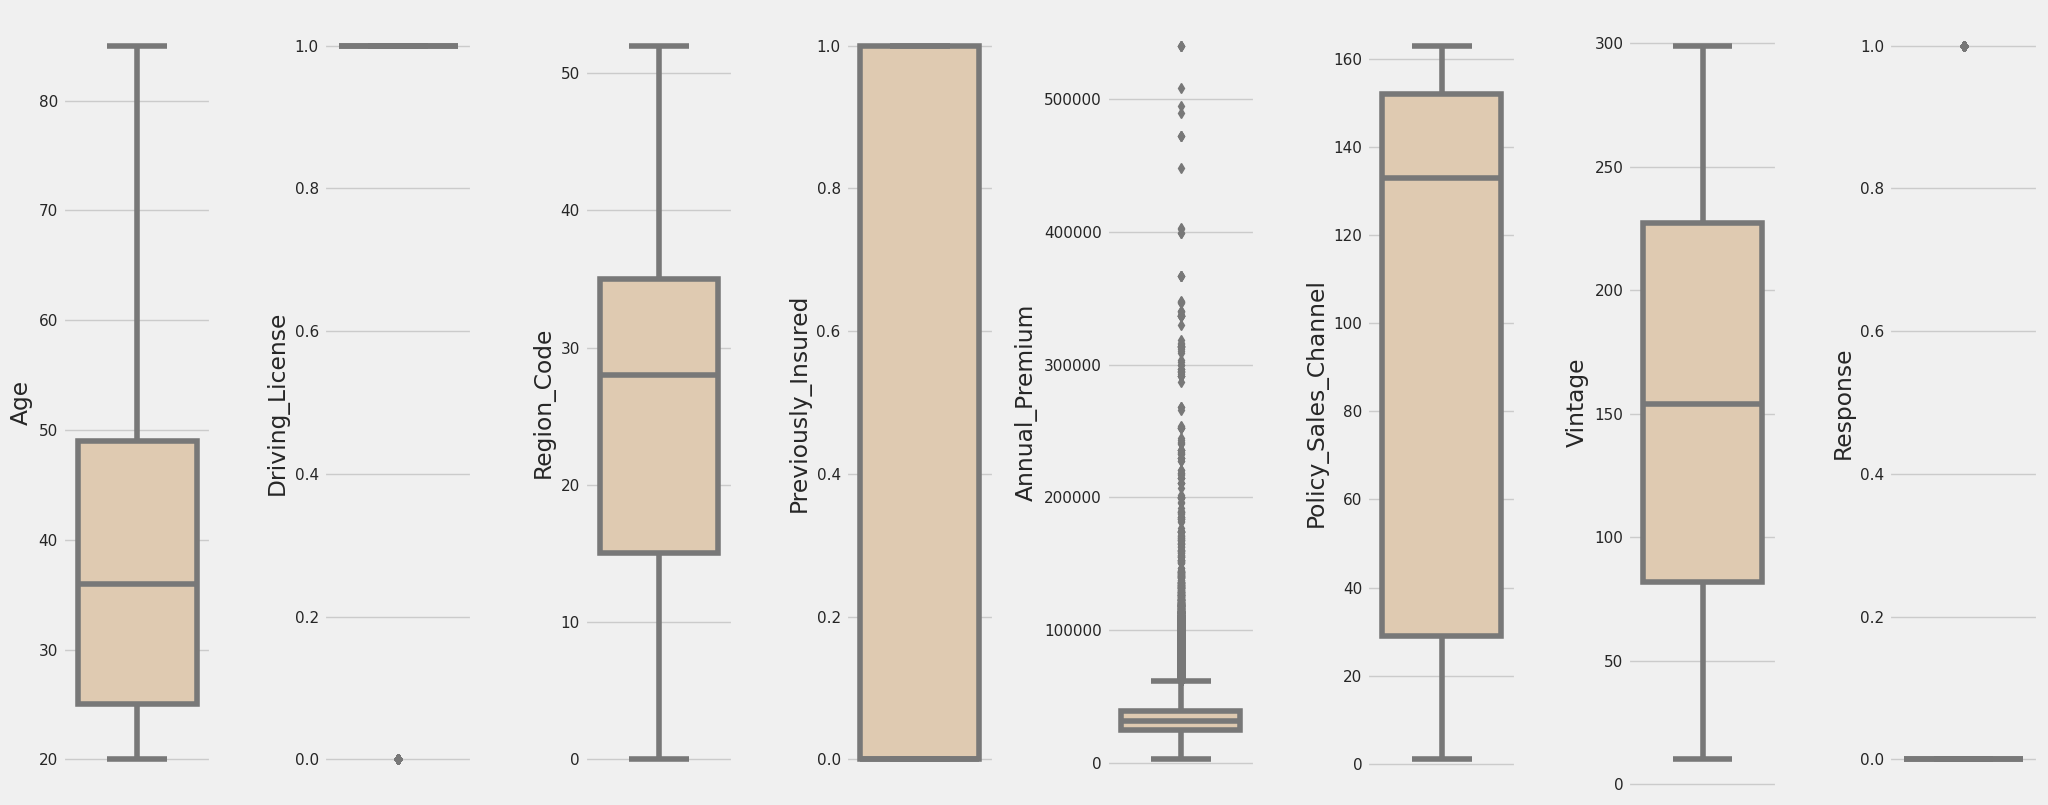

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

#### Hasil Observasi =
* Age : Distribusi data tidak normal. Umur pelanggan bervarian dari 20 tahun hingga 85 tahun, dengan kebanyakan pelanggan berusia antara 24 - 49 tahun.
* Driving_License : Merupakan boolean. Data tidak terdistribusi dengan normal. Kebanyakan pelanggan terkategori 1 (Memiliki izin mengemudi).
* Region_Code : Distribusi data normal. Dengan median di kode wilayah 28.
* Previously_Insured : Merupakan boolean. Data terdistribusi dengan rata antara 1 dan 0.
* Annual_Premium : Data terdistribusi normal, dengan kebanyakan annual premium sekitar 0 - 50000 (dibawah 100000), Terdapat banyak outliers yang nominalnya hingga diatas 400000.
* Policy_Sales_Channel : Distribusi data tidak normal dengan nilai tengah berada di nilai ± 130.
* Vintage : Distribusi data normal, dengan median di nilai ± 151.
* Response : Merupakan boolean. Data tidak terdistribusi dengan normal. Kebanyakan pelanggan terkategori 0 (Tidak berminat).

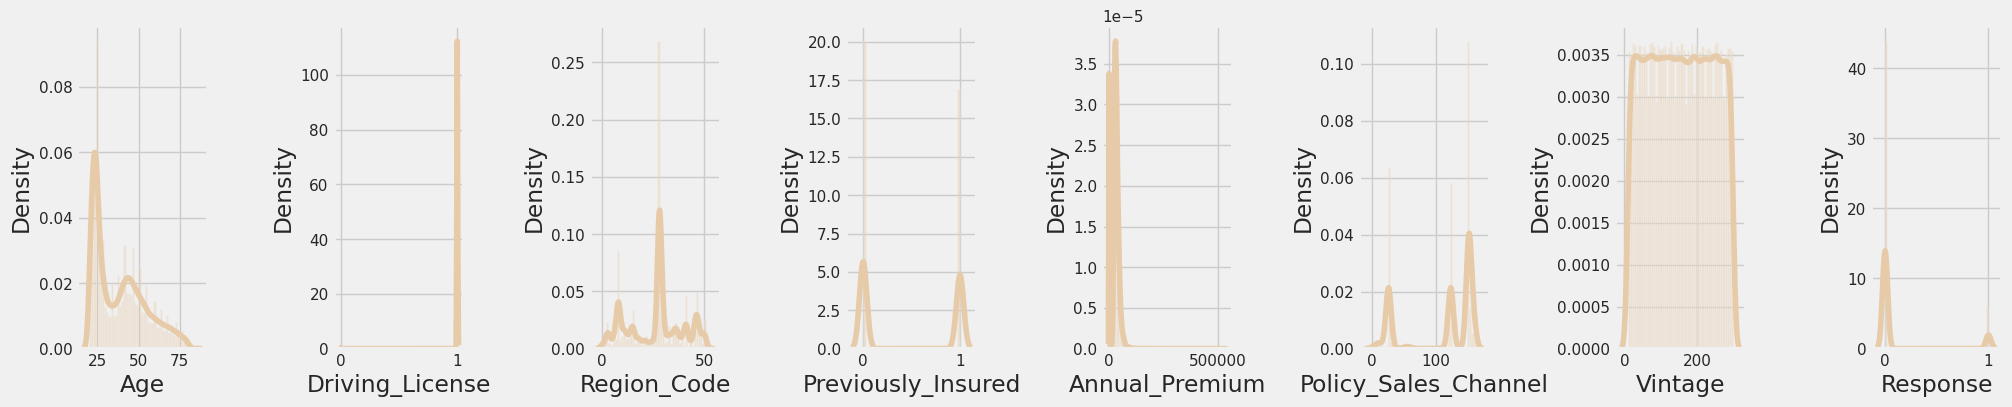

In [ ]:
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.distplot(df[num[i]], color='#E7CBA9')
    plt.tight_layout(pad=2)

#### Hasil Observasi =
* Age : Persebaran *positive skewed*.
* Driving_License : Merupakan bimodal, persebaran tidak rata, mayoritas nilai 1.
* Region_Code : Persebaran data normal.
* Previously_Insured : Merupakan bimodal, persebaran data rata antara 1 dan 0, dimana 0 terlihat sedikit lebih banyak.
* Annual_Premium : Distribusi data mendekati normal namun terdapat outliers diatas batas atas.
* Policy_Sales_Channel : Distribusi data tidak normal, cenderung *negative skewed*.
* Vintage : Persebaran data normal.
* Response : Merupakan bimodal, persebaran tidak rata, mayoritas nilai 0.

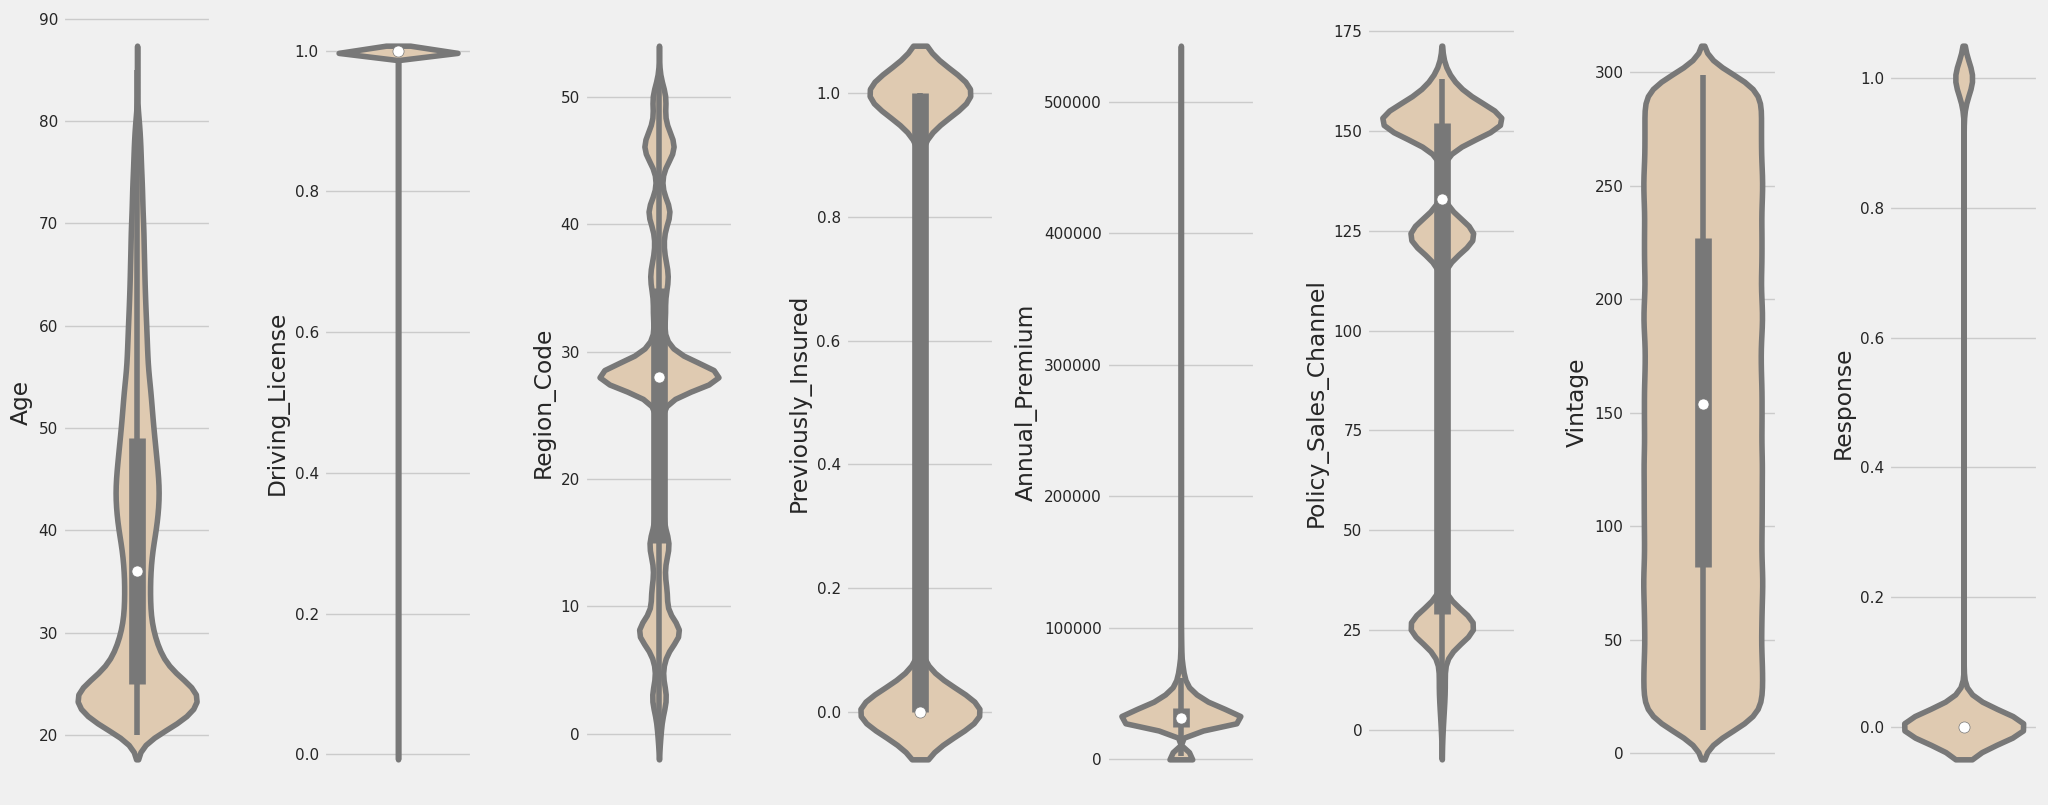

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

#### Hasil Observasi =
* Age : Mayoritas nilai 24.
* Driving_License : Mayoritas nilai 1.
* Region_Code : Mayoritas nilai 28.
* Previously_Insured : Terdapat 2 nilai 1 dan 0, terlihat dari chart nilai 0 sedikit lebih banyak.
* Annual_Premium : Kebanyakan nilai < 30000.
* Policy_Sales_Channel : Mayoritas nilai ±151.
* Vintage : Data merata di tiap nilainya.
* Response : Mayoritas nilai 0.

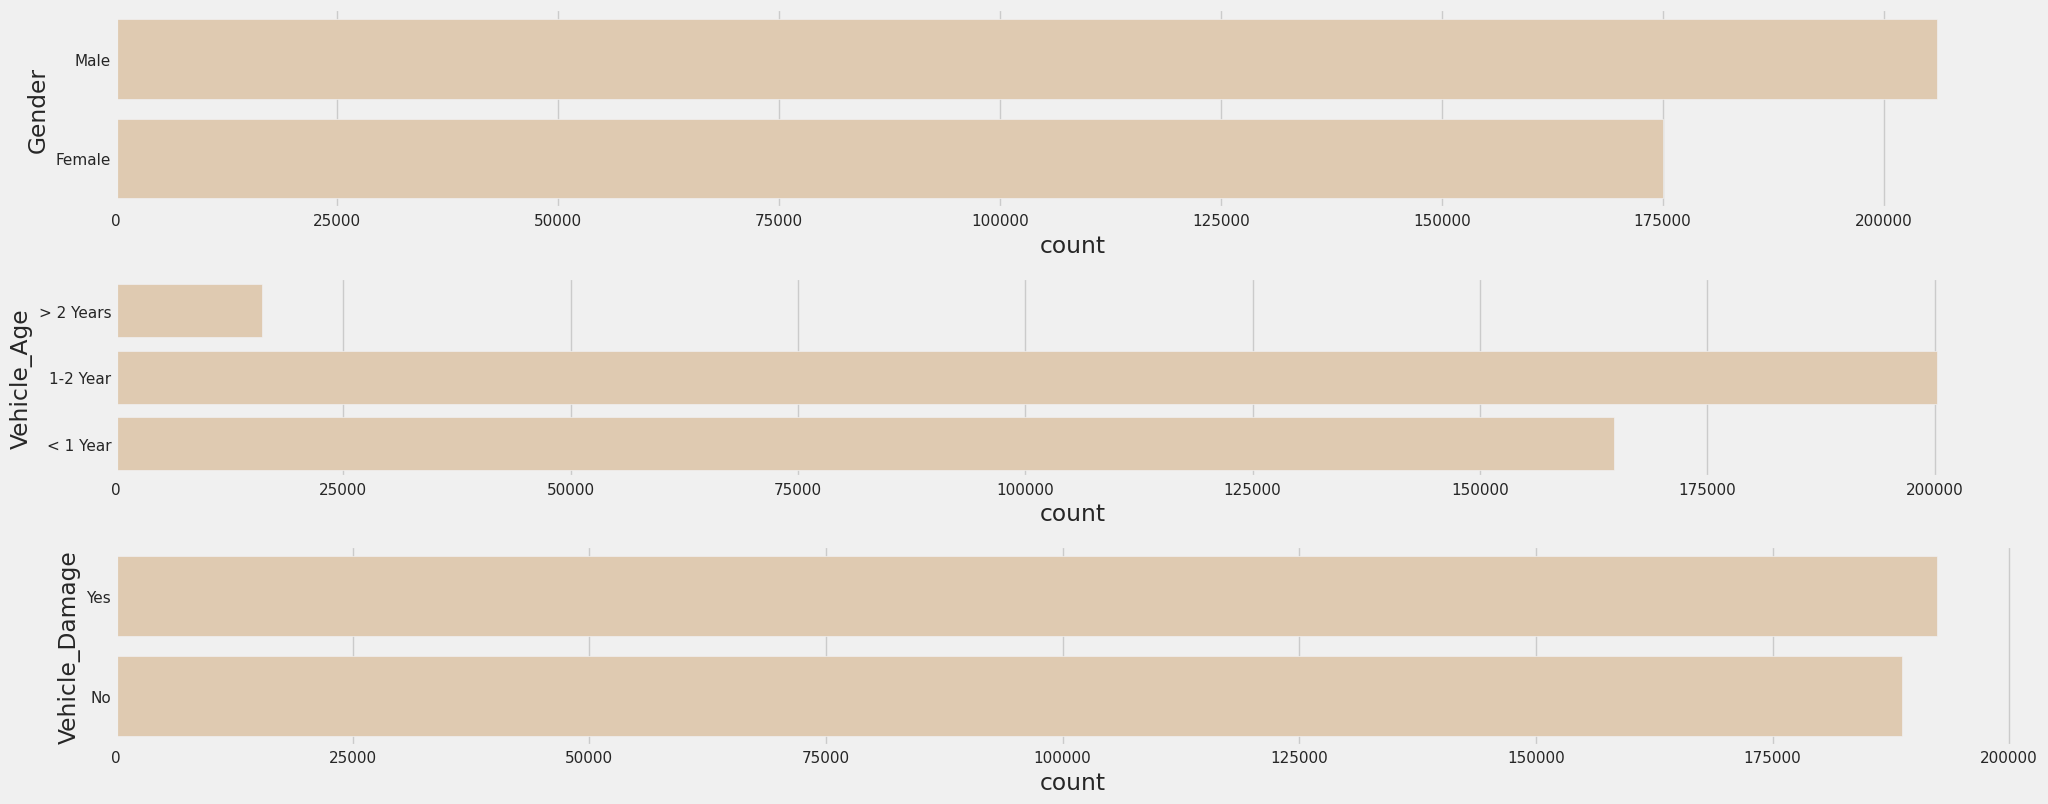

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1, i+1)
    sns.countplot(y=df[cats[i]], color='#E7CBA9')
    plt.tight_layout()

#### Hasil Observasi =
* Gender : Mayoritas nilai **'Male'**.
* Vehicle_Age : Mayoritas nilai **'1-2 Year'**, disusul dengan '<1 Year' dan yang paling sedikit '>2 Years'.
* Vehicle_Damage : Mayoritas nilai **'Yes'**.

## Kesimpulan

Yang harus di-follow up saat data pre-processing?

> *   **Outliers**, pada kolom Annual_Premium terdapat outliers.
> *   **Distribusi data tidak normal**, banyak kolom yang distribusinya belum seimbang sehingga perlu dilakukan feature transformation.
> *   **Class Imbalance**, melakukan oversampling/undersampling untuk kolom Response dengan perbandingan minimal 1:3.
> *   **Feature Encoding**, pada kolom Vehicle_Age dan Gender  dilakukan label encoding.
> *   Mengubah tipe data, mengubah tipe data Vehicle_Damage menjadi numerik dengan astype()/pd.numeric().

# **Multivariate Analysis**

<Axes: >

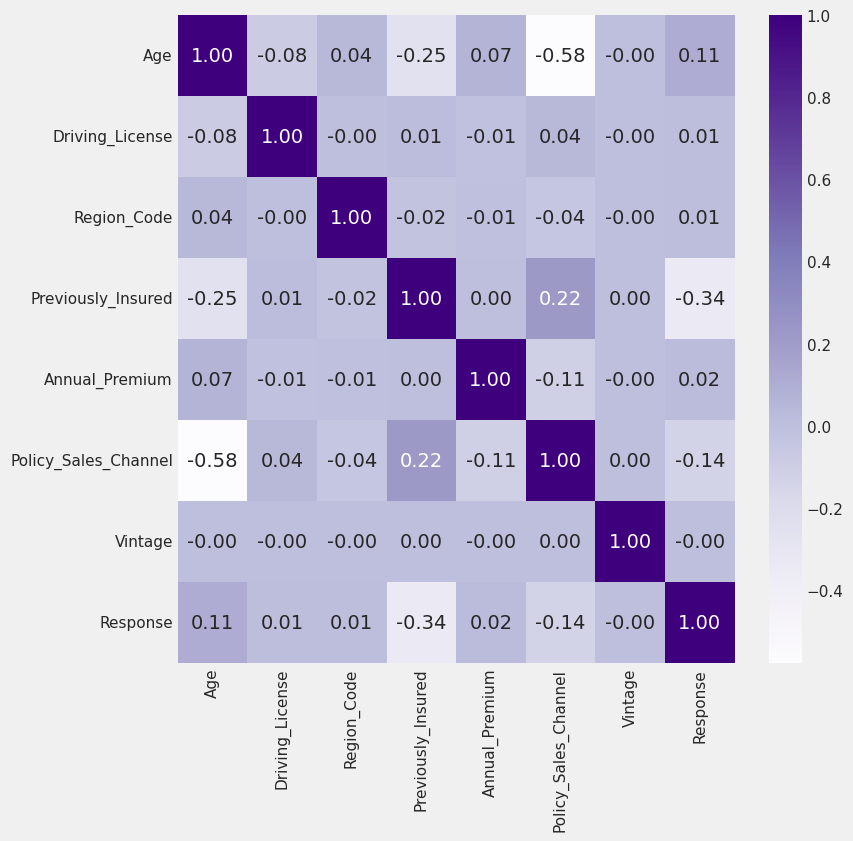

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')

#### Hasil Observasi =

*   Age - Response <br>
    Berkolerasi positif yang sangat rendah. Semakin tua umur semakin berminat terhadap ‘Asuransi Kendaraan’.
*   Region_Code - Response<br>
    Positif namun hampir tidak memiliki kolerasi.
*   Driving_License - Response<br>
    Positif namun hampir tidak memiliki kolerasi.
*   Annual_Premium - Response<br>
Positif namun hampir tidak memiliki kolerasi.
*   Policy_Sales_Channel - Response<br>
Berkolerasi negatif yang sangat rendah. Semakin rendah code channel sales semakin tinggi minat terhadap ‘Asuransi Kendaraan’.
*   Vintage - Response<br>
Tidak memiliki korelasi.
*   Previously_Insured - Response<br>
Berkolerasi negatif. Jika pelanggan belum memiliki ‘Asuransi Kendaraan pelanggan cenderung berminat terhadap ‘Asuransi Kendaraan’. Pelanggan yang tergolong berumur cenderung tidak memiliki asuransi kendaraan sebelumnya.
*  Vehicle_Age - Response<br>
Berkolerasi low positif. Semakin tua umur kendaraan semakin tinggi minat terhadap ‘Asuransi Kendaraan’. Dimana semakin tua pelanggan akan semakin tua umur kendaraannya serta kebanyakan kendaraan yang >2 tahun belum memiliki asuransi kendaraan.
*   Vehicle_Damage - Response<br>
Berkolerasi positif yang sangat rendah. Jika kendaraan rusak (damaged) maka semakin tinggi minat terhadap ‘Asuransi Kendaraan’.
*   Vehicle_Age - Policy_Sales_Channel
Korelasi low negative. Semakin kecil kode media mengontak customers, semakin tua kendaraannya.
*   Vehicle_Age - Age - Response<br>
Korelasi positif. Semakin tua umur customers semakin pula umur kendaraan yang mereka miliki.
*   Vehicle_Age - Previously_Insured<br>
Korelasi low negative. Semakin tua kendaraan milik customers cenderung belum memiliki asuransi.
*   Vehicle_Age - Vehicle_Damage<br>
Korelasi low positive. Semakin tua kendaraan milik customers cenderung memiliki kerusakan pada kendaraannya.
*   Age - Policy_Sales_Channel<br>
Korelasi negative. Kode media mengontak orang yang cenderung tua menggunakan kode media yang berada di kode kecil.
*   Vehicle_Damage - Previously_Insured<br>
Korelasi highly negative. Kendaraan yang mengalami kerusakan cenderung belum memiliki asuransi.

<Figure size 1500x1500 with 0 Axes>

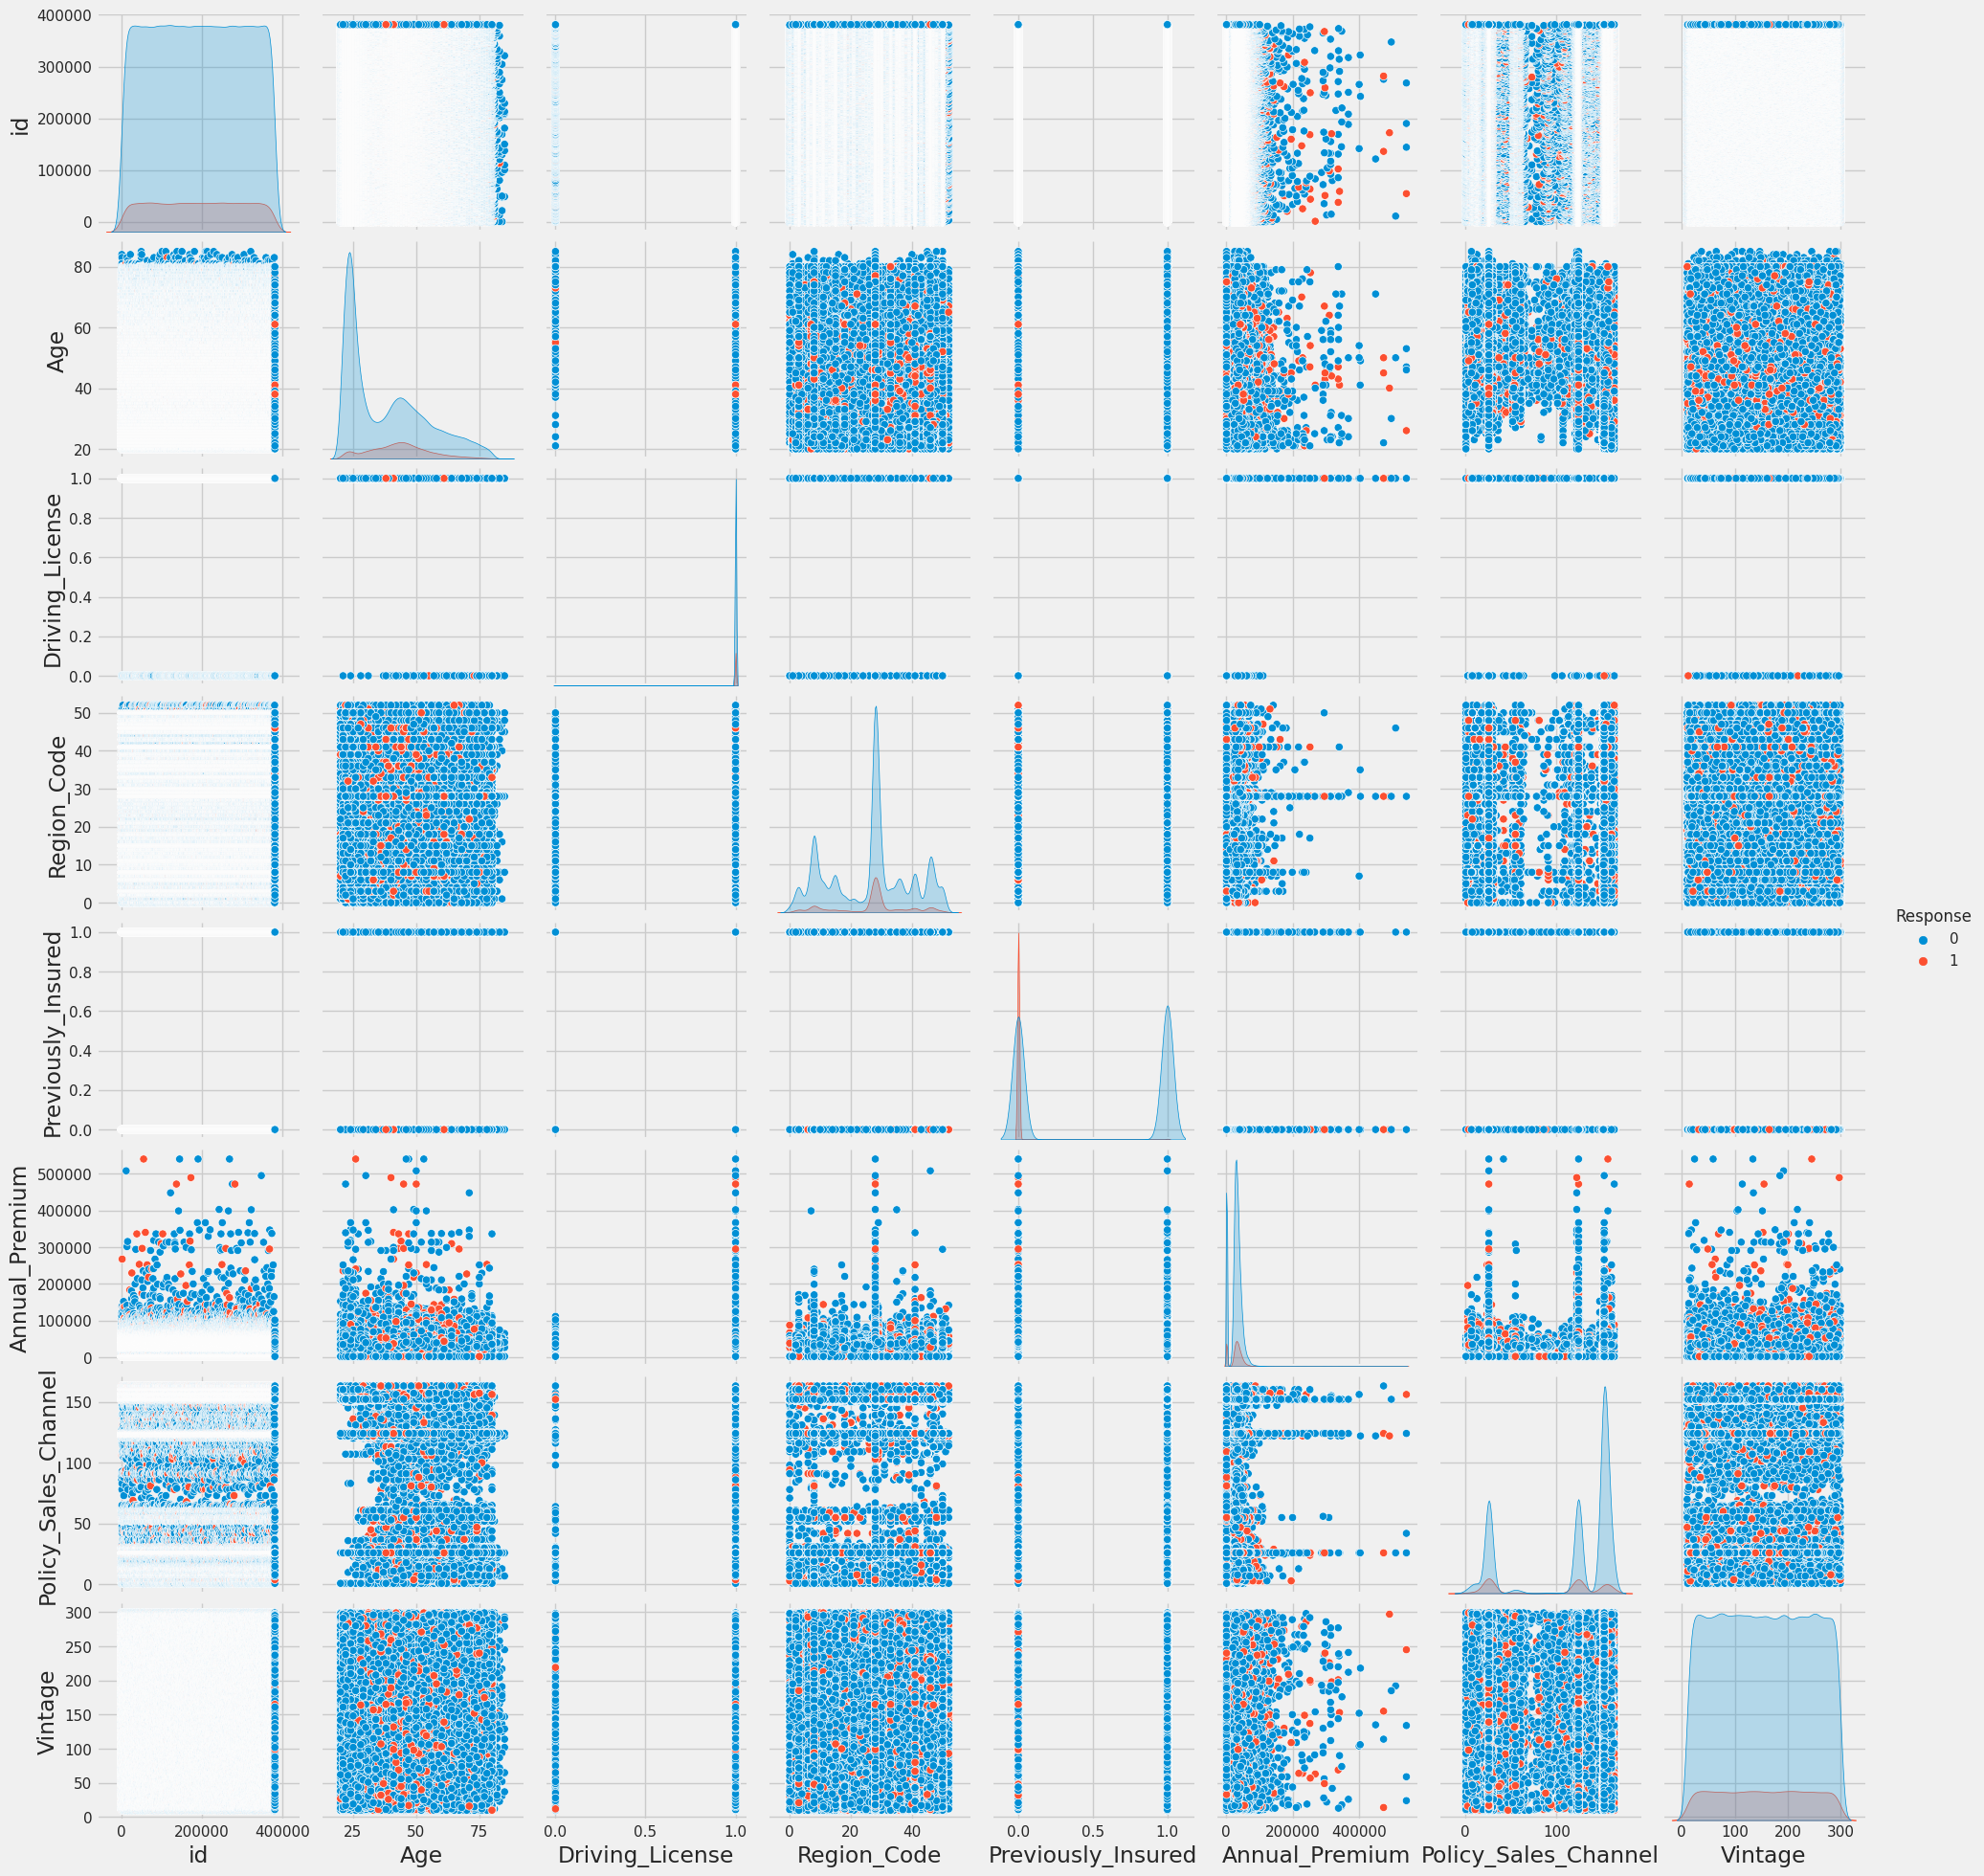

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde',hue='Response')

## Kesimpulan
1. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>

  > * Target memiliki korelasi tinggi dengan Previously_Insured sebesar -0.34 yang berarti berkorelasi negatif.
  > * Target memiliki korelasi tinggi dengan Vehicle_Damage sebesar 0.35 yang berarti berkorelasi positif..
  > * Dari heatmap dapat disimpulkan Age, Vehicle_Age, Previously_Insured, dan Vehicle Damage memiliki kausalitas yang cukup tinggi.


2. Bagaimana korelasi antar-feature, apakah ada pola yang menarik?
  >- Heatmap: <br>
  >  - Terdapat korelasi yang kuat antara Age dan Vehicle_Age sebesar 0.77 yang berarti korelasi highly positive dimana jika dibandingkan dengan target/Response kolom Vehicle_Age memiliki korelasi yang lebih tinggi sehingga dipertimbangkan mempertahankan Vehicle_Age dibandingkan Age. <br><br>
Note: korelasi kuat adalah nilai ">0.7" (kemungkinan redundan).<br><br>
  >- Pairplot: <br>
      - Orang-orang yang sebelumnya belum pernah menggunakan asuransi kendaraan  diumur 35 sampai 45 dan juga diumur 60 sampai 65 cenderung menjawab response 1.
      - Orang-orang yang mempunyai driving license diumur 35 sampai 45 dan juga diumur 60 sampai 65 cenderung menjawab response 1.<br><br>
    Note: Response 1 yang artinya pelanggan tertarik untuk membeli asuransi kendaraan.
>

# **Business Insight**

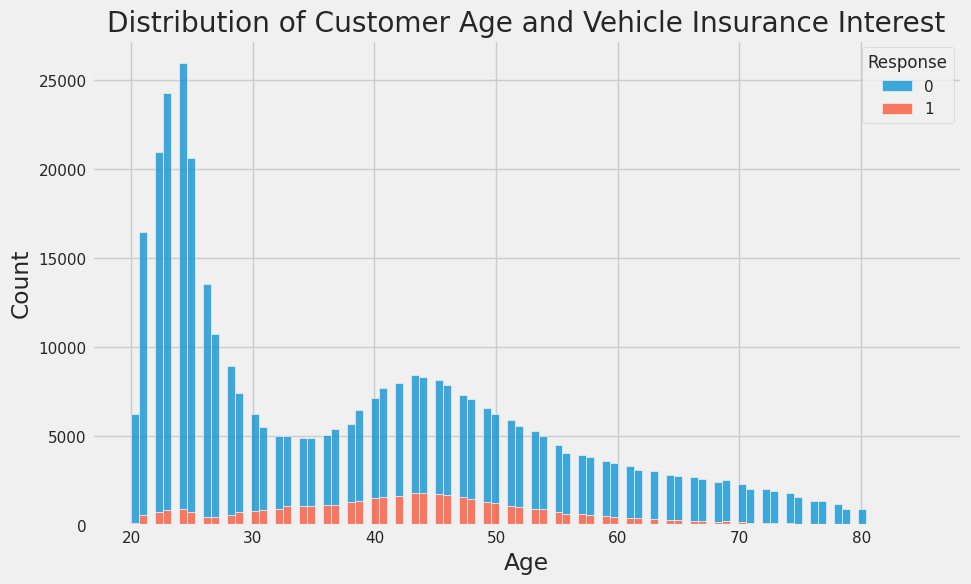

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Response", multiple="stack")
plt.title("Distribution of Customer Age and Vehicle Insurance Interest")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

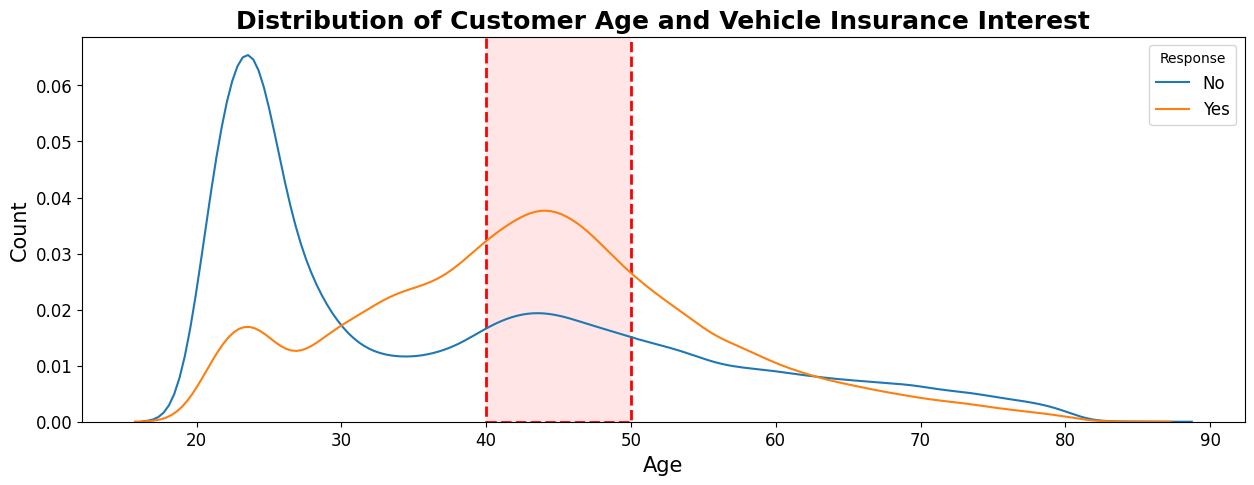

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
sns.distplot(df[df['Response'] == 0]['Age'], hist = False)
sns.distplot(df[df['Response'] == 1]['Age'], hist = False)
plt.legend(title='Response', labels = ['No', 'Yes'], fontsize = 12)
plt.title('Distribution of Customer Age and Vehicle Insurance Interest', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((40, 0), 10, 0.07, fill=True, facecolor ='red', alpha=0.1))
ax.add_patch(Rectangle((40, 0), 10, 0.07, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))
plt.show()


*   Dilihat dari grafik diatas didapatkan insight bahwa pelanggan asuransi kesehatan paling banyak adalah usia antara 20 sampai 30 tahun, sedangkan **peminat Asuransi kendaraan terbanyak rata-rata di usia 40 sampai 50 tahun**.

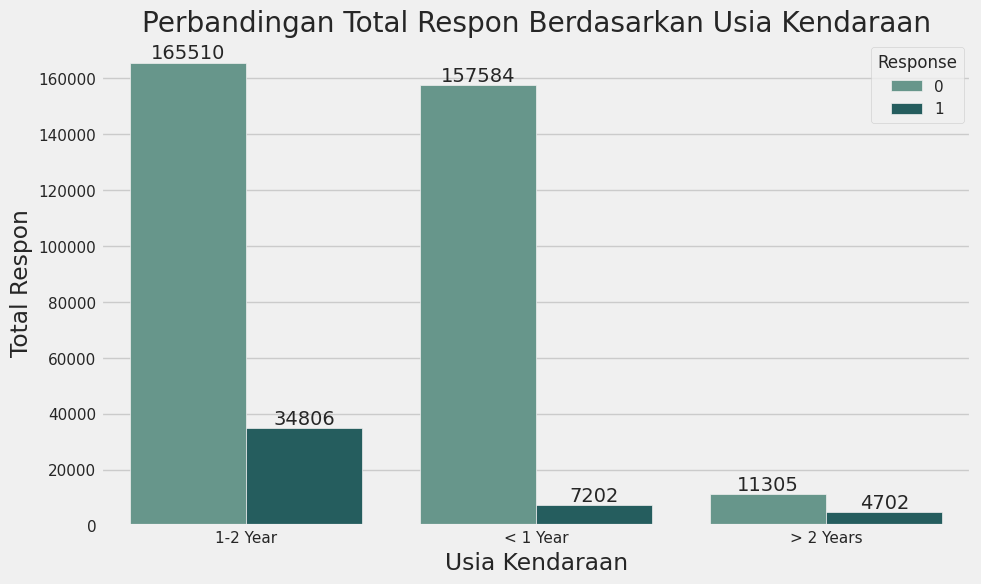

In [ ]:
data1 = df.groupby(['Response', 'Vehicle_Age']).agg({'id'  :'nunique'}).reset_index()
data1.columns = ['Response', 'Vehicle_Age', 'JumlahPelanggan']

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Vehicle_Age", y="JumlahPelanggan", data=data1, estimator=sum, hue="Response", palette=['#5F9E8F', '#1B6767'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Perbandingan Total Respon Berdasarkan Usia Kendaraan")
plt.xlabel("Usia Kendaraan")
plt.ylabel("Total Respon")
plt.show()


*   Berdasarkan dari umur kendaraan pelanggan, mayoritas pelanggan memiliki kendaraan yang berumur 1-2 tahun sebanyak 200.316 pelanggan, diikuti dengan kendaraan <1 tahun sebanyak 164.786 pelanggan, dan kendaraan >2 tahun sebanyak 16.007 pelanggan.
*   Dapat dilihat berdasarkan rasio pelanggan yang memiliki kendaraan 1-2 tahun lebih banyak tertarik terhadap Asuransi Kendaraan dibandingkan pelanggan lain.



In [ ]:
#copy data frame
data = df.copy()

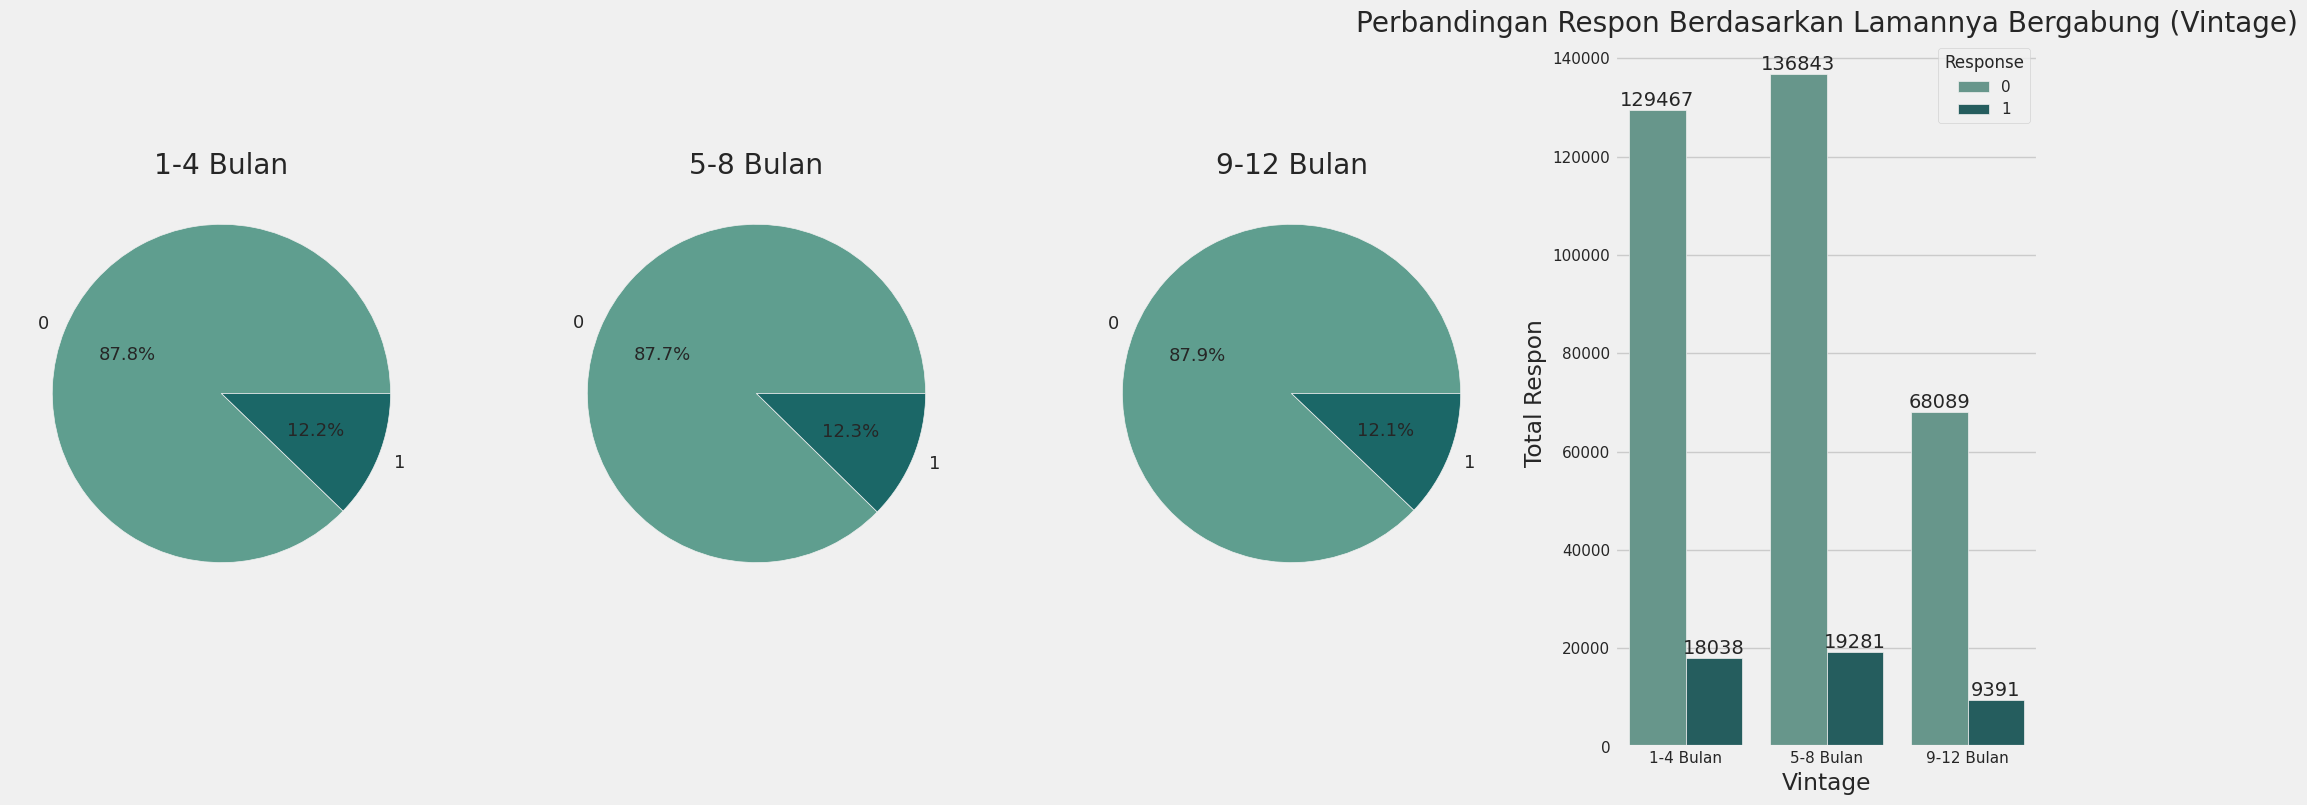

In [ ]:
# convert hari ke bulan
def vintage(x):
    if x['Vintage'] <= 121:
        bulan = '1-4 Bulan'
    elif x['Vintage'] <= 240:
        bulan = '5-8 Bulan'
    elif x['Vintage'] <=365:
        bulan = '9-12 Bulan'
    else:
        bulan = '> 1 Tahun'
    return bulan

#membuat columns baru vintage_bulan
data['Vintage_Bulan'] = data.apply(lambda x: vintage(x), axis=1)

#Groupby
data2 = data.groupby(['Vintage_Bulan', 'Response']).agg({'id'  :'nunique'}).reset_index()
data2.columns = ['Vintage_Bulan', 'Response', 'JumlahPelanggan']

#membuat barplot
fig, axes = plt.subplots(ncols=4, nrows=1)

ax = sns.barplot(x="Vintage_Bulan", y="JumlahPelanggan", data=data2, estimator=sum, hue="Response", palette=['#5F9E8F', '#1B6767'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Perbandingan Respon Berdasarkan Lamannya Bergabung (Vintage)")
plt.xlabel("Vintage")
plt.ylabel("Total Respon")


#membuat pie chart
for (c, grp), ax in zip(data2.groupby("Vintage_Bulan"), axes.flat):
    ax.pie(grp.JumlahPelanggan, labels=grp.Response, colors=['#5F9E8F', '#1B6767'], autopct='%1.1f%%', textprops={'fontsize':13})
    ax.set_title(c)


plt.tight_layout()
plt.show()



*   Dari grafik diatas, pelanggan yang
bergabung dengan rentan waktu 5-8 bulan
Hari memiliki ketertarikan terhadap
produk ‘Asuransi Kendaraan’ yang cukup
banyak sekitar 19281 pelanggan
dibandingkan pelanggan yang bergabung
dengan rentan waktu lebih dari 9 bulan
(lebih lama bergabung) sekitar 9391
pelanggan
*  Akan tetapi berdasarkan rasio persentase masing-masing vintage masih sangat kecil hanya 12% setiap vintage.



In [129]:
df_response = pd.DataFrame(df.groupby(['Response'])['Gender'].value_counts())
df_response.columns = ['count']
df_response = df_response.reset_index()

df_gender = pd.DataFrame(df.groupby(['Gender'])['Gender'].value_counts())
df_gender.columns = ['count']
df_gender.reset_index(level=1, drop=True, inplace=True)
df_gender.reset_index(inplace=True)

df_response2 = df_response.merge(df_gender,how='inner',on='Gender')
df_response2['percentage'] = round(df_response2['count_x']/df_response2['count_y']*100,2)

In [130]:
df_response2 = df_response.merge(df_gender,how='inner',on='Gender')
df_response2['percentage'] = round(df_response2['count_x']/df_response2['count_y']*100,2)

In [131]:
df_ress = pd.pivot_table(df_response2, index=['Gender'],columns=['Response'],values=['percentage']).reset_index()
df_ress.columns =['Gender','N',"Y"]

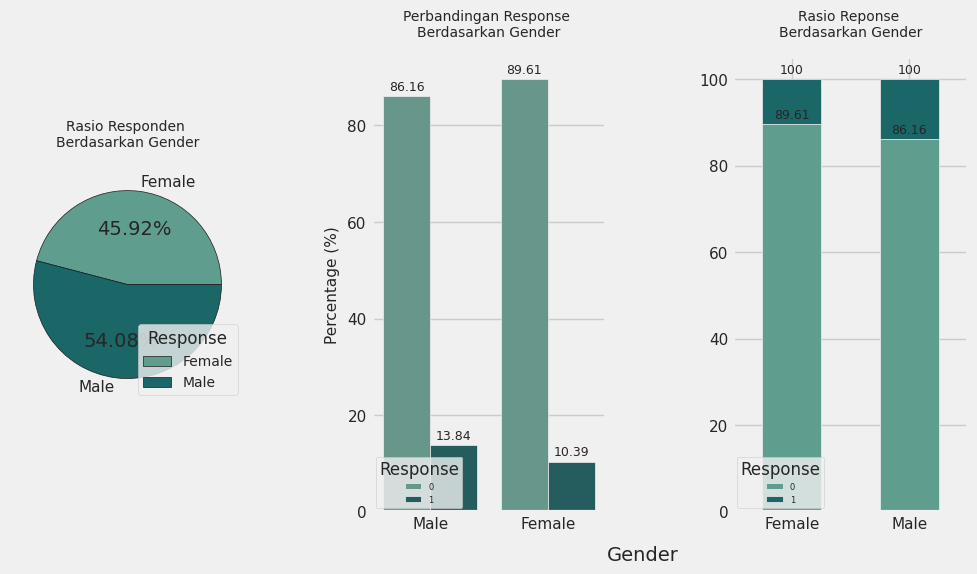

In [157]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

# Plot 1: Pie Chart
ax[0].pie(df_gender['count'], labels=df_gender['Gender'],
          wedgeprops={"edgecolor": "k"}, autopct='%.2f%%',colors=['#5F9E8F', '#1B6767'])
ax[0].set_title('Rasio Responden \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ax[0].legend(title='Response', fontsize=10, loc='lower right')

# Plot 2: Grouped Bar Plot
sns.barplot(x='Gender', y='percentage', data=df_response2,
            hue='Response', ax=ax[1],palette=['#5F9E8F', '#1B6767'])
ax[1].bar_label(ax[1].containers[0], fontsize=9, padding=2)
ax[1].bar_label(ax[1].containers[1], fontsize=9, padding=2)
ax[1].set_title('Perbandingan Response \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ax[1].set_ylabel('Percentage (%)', fontsize=11, labelpad=5)
ax[1].set_xlabel('')
ax[1].legend(title='Response', fontsize=6, loc='lower left')
ax[1].text(1.5, -10, s='Gender')

# Plot 3: Stacked Bar Plot
df_ress.plot(kind='bar', stacked=True, figsize=(10, 6),
             ax=ax[2],color=['#5F9E8F', '#1B6767'])
ax[2].bar_label(ax[2].containers[0], fontsize=9, padding=2)
ax[2].bar_label(ax[2].containers[1], fontsize=9, padding=2)
ax[2].set_title('Rasio Reponse \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ticksy = ['Female', 'Male']
ax[2].set_xticklabels(ticksy, rotation=0)
ax[2].legend(title='Response', labels=['0', '1'], fontsize=6, loc='lower left')

plt.tight_layout()
plt.show()

* Berdasarkan dari data, mayoritas pelanggan merupakan berjenis kelamin laki-laki sebesar 206.089 (54,08%) orang dari total 381.109 orang, sedangkan 175.020 (45.92%)  adalah perempuan.

* Berdasarkan gender ketertarikan terhadap produk ‘Asuransi Kendaraan’  kebanyakan laki-laki 28.525 (13,84% respon menunjukan ketertarikan) sedangkan, perempuan 18.185 (10.39% respon menunjukan ketertarikan). Lebih banyak laki-laki tertarik terhadap ‘Asuransi Kendaraan’.

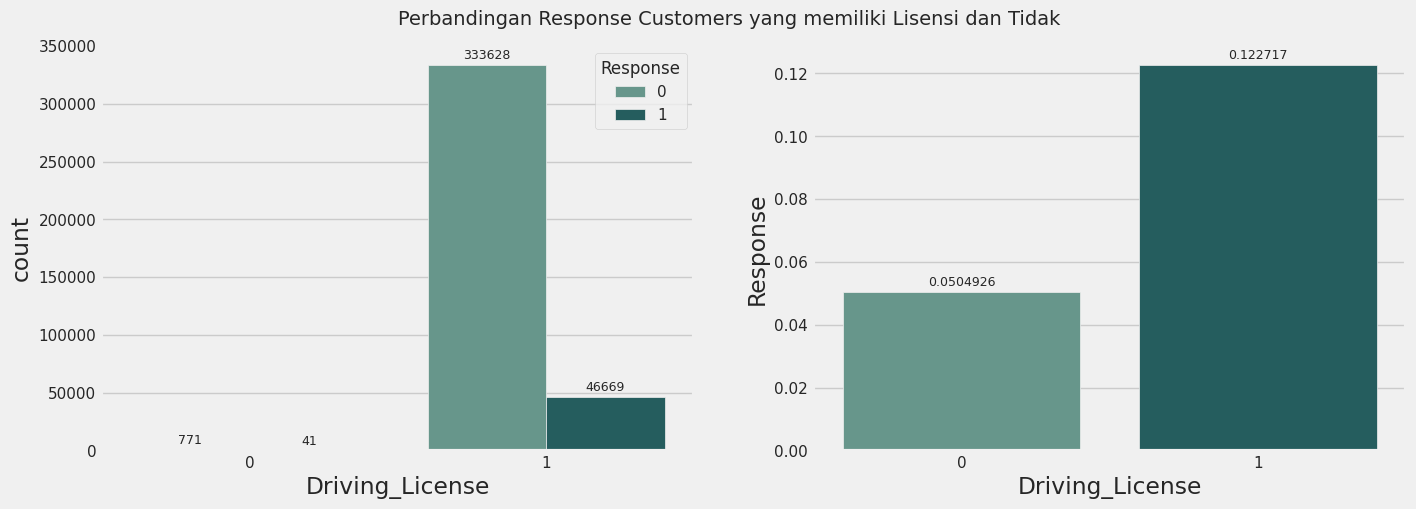

In [146]:
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='Driving_License', data=df, hue='Response', ax=ax1, palette=['#5F9E8F', '#1B6767'])
sns.barplot(x='Driving_License', y='Response', data=df ,ax=ax2, ci=None, palette=['#5F9E8F', '#1B6767'])
ax1.bar_label(ax1.containers[0], fontsize=9, padding=2)
ax1.bar_label(ax1.containers[1], fontsize=9, padding=2)
ax2.bar_label(ax2.containers[0], fontsize=9, padding=2)
ax1.set_title('Perbandingan Response Customers yang memiliki Lisensi dan Tidak', fontsize=14, pad=15, ha='left')
plt.show()

*  Berdasarkan grafik diatas pelanggan yang memiliki Driving Lisensi lebih cenderung tertarik dengan penawaran Asuransi Kendaraan.

In [162]:
df_response4 = pd.DataFrame(df.groupby(['Response'])['Previously_Insured'].value_counts())
df_response4.columns = ['count']
df_response4 = df_response4.reset_index()

df_insured = pd.DataFrame(df.groupby(['Previously_Insured'])['Previously_Insured'].value_counts())
df_insured.columns = ['count']
df_insured.reset_index(level=1, drop=True, inplace=True)
df_insured.reset_index(inplace=True)

df_insureds = df_response4.merge(df_insured, how='inner', on='Previously_Insured')
df_insureds['percentage'] = round(df_insureds['count_x']/df_insureds['count_y']*100,2)

Text(0, 0.5, 'Persentase (%)')

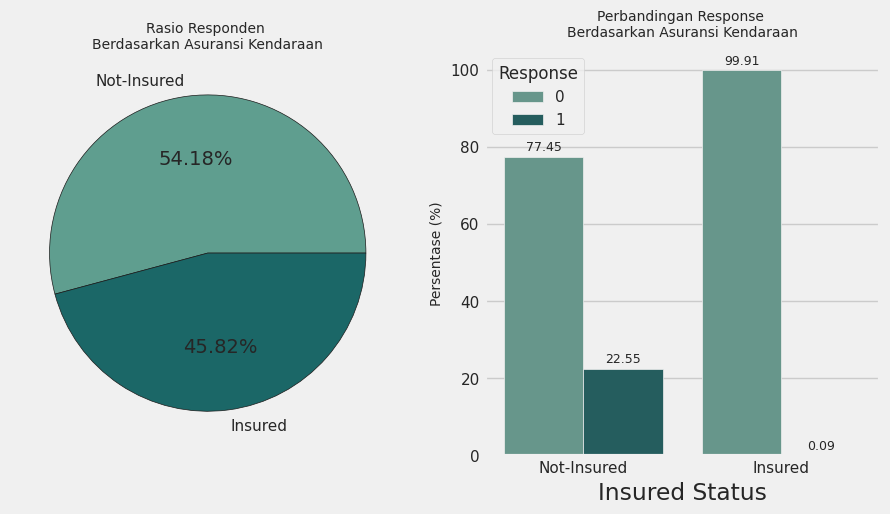

In [163]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pie(df_insured['count'],labels=['Not-Insured','Insured'],colors=['#5F9E8F', '#1B6767'],wedgeprops={'edgecolor':'k'},autopct='%.2f%%')
ax[0].set_title('Rasio Responden \nBerdasarkan Asuransi Kendaraan',fontsize=10,pad=5)

sns.barplot(x='Previously_Insured',y='percentage', data=df_insureds,hue='Response', palette=['#5F9E8F', '#1B6767'],ax=ax[1])
ax[1].bar_label(ax[1].containers[0],fontsize=9,padding=2)
ax[1].bar_label(ax[1].containers[1],fontsize=9,padding=2)
ax[1].set_title('Perbandingan Response \nBerdasarkan Asuransi Kendaraan',fontsize=10,pad=10)
ax[1].set_xticklabels(['Not-Insured','Insured'])
ax[1].set_xlabel('Insured Status')
ax[1].set_ylabel('Persentase (%)', fontsize=10, labelpad=5)

* Dari data terdapat 192.413 pelanggan yang memiliki kendaraan yang buruk dan 188.696 yang memiliki kendaraan yang masih tergolong bagus.

* Berdasarkan dari keadaan kendaraan milik pelanggan, pelanggan yang memiliki kondisi kendaraan yang buruk lebih berminat terhadap ‘Asuransi Kendaraan’ dengan total 45.728 orang menjawab ‘Berminat’ dibandingkan pelanggan yang memiliki kendaraan yang masih tergolong bagus, dimana hanya 982 orang menjawab ‘Berminat’.

In [152]:
df_response3 = pd.DataFrame(df.groupby(['Response'])['Vehicle_Damage'].value_counts())
df_response3.columns = ['count']
df_response3 = df_response3.reset_index()

df_damage = pd.DataFrame(df.groupby(['Vehicle_Damage'])['Vehicle_Damage'].value_counts())
df_damage.columns = ['count']
df_damage.reset_index(level=1, drop=True, inplace=True)
df_damage.reset_index(inplace=True)

df_damages = df_response3.merge(df_damage,how='inner',on='Vehicle_Damage')
df_damages['percentage'] = round(df_damages['count_x']/df_damages['count_y']*100,2)

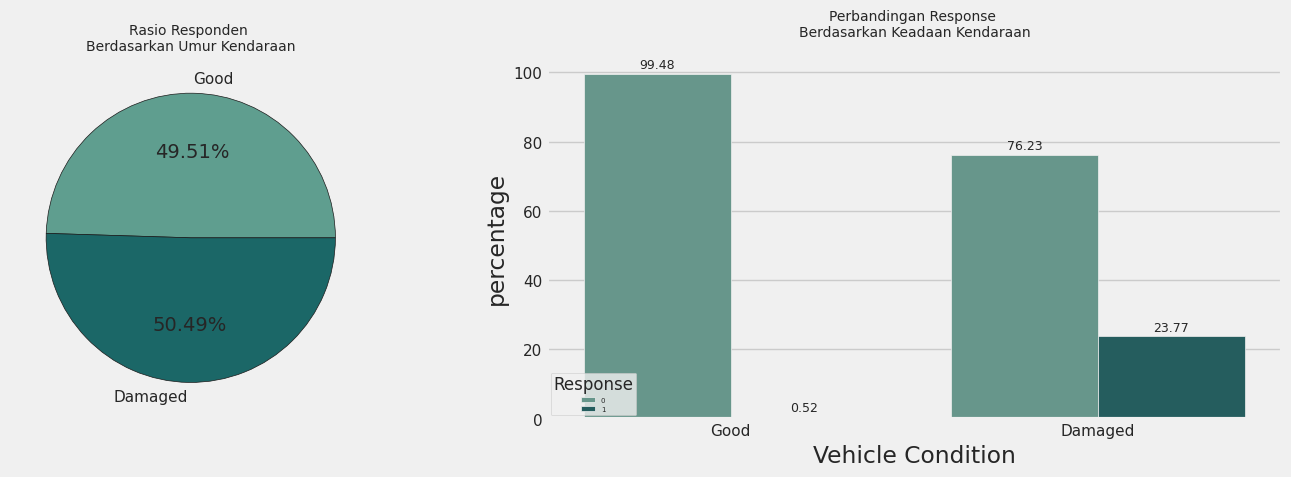

In [156]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].pie(df_damage['count'], labels = ['Good','Damaged'], colors=['#5F9E8F', '#1B6767'],
          wedgeprops={"edgecolor":"k"}, autopct='%.2f%%')
ax[0].set_title('Rasio Responden \nBerdasarkan Umur Kendaraan', fontsize=10, pad=5, ha='center')

sns.barplot(x='Vehicle_Damage',y='percentage', data=df_damages, hue='Response', palette=['#5F9E8F', '#1B6767'],ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize=9, padding=2)
ax[1].bar_label(ax[1].containers[1], fontsize=9, padding=2)
ticksy=['Good','Damaged']
ax[1].set_xticklabels(ticksy)
ax[1].set_title('Perbandingan Response \nBerdasarkan Keadaan Kendaraan', fontsize=10, pad=15, ha='center')

ax[1].set_xlabel('Vehicle Condition')
ax[1].legend(title='Response',fontsize=5,loc='lower left')

plt.tight_layout()

* Dari 206.481 pelanggan yang belum memiliki ‘Asuransi Kendaraan’ terdapat 22.55% (46.552 orang) berminat terhadap ‘Asuransi Kendaraan’ yang ditawarkan oleh perusahaan dan 174.628 pelanggan yang sudah memiliki ‘Asuransi Kendaraan’ dimana walaupun sudah memiliki terdapat 0.09% (158 orang) juga berminat.

* Pelanggan yang belum memiliki ‘Asuransi Kendaraan’ sebelumnya lebih berminat terhadap produk cross-selling ‘Asuransi Kendaraan’.